# What makes a healthy city?

### First we import the required tools and our data

In [4]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

In [5]:
from bs4 import BeautifulSoup


source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text

soup = BeautifulSoup(source, 'html5lib')

In [6]:
table_post = soup.find('table')
fields = table_post.find_all('td')

postcode = []
borough = []
neighborhood = []

for i in range(0, len(fields), 3):
    postcode.append(fields[i].text.strip())
    borough.append(fields[i+1].text.strip())
    neighborhood.append(fields[i+2].text.strip())
        
df_pc = pd.DataFrame(data=[postcode, borough, neighborhood]).transpose()
df_pc.columns = ['Postcode', 'Borough', 'Neighborhood']
df_pc.head()

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


### Next we start the process of cleaning it

In [7]:
df_pc['Borough'].replace('Not assigned', np.nan, inplace=True)
df_pc.dropna(subset=['Borough'], inplace=True)

df_pc.head()

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [8]:
df_pc = df_pc.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(', '.join).reset_index()
df_pc.columns = ['Postcode', 'Borough', 'Neighborhood']

df_pc['Neighborhood'].replace('Not assigned', "Queen's Park", inplace=True)

In [9]:
df_pc 

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [10]:
print(df_pc.shape)


(103, 3)


In [11]:
df_geo = pd.read_csv('http://cocl.us/Geospatial_data')
# merge with postal code information

In [12]:
# Create new columns in the table Latitude and Longitude that will be able to correspond with the postal codes in the other table so that they can be merged
df_geo.columns = ['Postcode', 'Latitude', 'Longitude']

In [13]:
# Merge the two tables into a new dataframe with the variables we want to examine called "tor"
df = pd.merge(df_pc, df_geo, on=['Postcode'], how='inner')
df_tor = df[['Borough', 'Neighborhood', 'Postcode', 'Latitude', 'Longitude']].copy()

In [14]:
df_tor

,Borough,Neighborhood,Postcode,Latitude,Longitude
0,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711
3,Scarborough,Woburn,M1G,43.770992,-79.216917
4,Scarborough,Cedarbrae,M1H,43.773136,-79.239476
5,Scarborough,Scarborough Village,M1J,43.744734,-79.239476
6,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",M1K,43.727929,-79.262029
7,Scarborough,"Clairlea, Golden Mile, Oakridge",M1L,43.711112,-79.284577
8,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",M1M,43.716316,-79.239476
9,Scarborough,"Birch Cliff, Cliffside West",M1N,43.692657,-79.264848


### Now we're going to map the data we have and cluster it

In [15]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="on_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [16]:
# @hidden_cell

CLIENT_ID = 'I5ODTPOSQVQYRRBBSQQQSZPAJHZBDVMEJUTJXYZYY0RDC3AA' 
CLIENT_SECRET = 'BG5VOOXWAS24FZI5RYLGXNJXDP14AD3VKR5YUKTHWRGQ41F3'
VERSION = '20180605' # Foursquare API version

In [17]:
# create map of Toronto using latitude and longitude values
map_tor = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(df_tor['Latitude'], df_tor['Longitude'], df_tor['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='purple',
        fill=True,
        fill_color='#9286cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor


Ok great. We have a map and it seems to be reading our neighbourhood data. Now we're going to use foursquare to import some information about these different neighbourhoods so we can compare them.

In [18]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

What we're about to do now is use the forsquare API to import a bunch of venue information for each of these neighbourhoods and save it in the dataframe Toronto_venues

In [19]:
Toronto_venues = getNearbyVenues(names=df_tor['Neighborhood'],
                                   latitudes=df_tor['Latitude'],
                                   longitudes=df_tor['Longitude']
                                  )

Rouge, Malvern
Highland Creek, Rouge Hill, Port Union
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
East Birchmount Park, Ionview, Kennedy Park
Clairlea, Golden Mile, Oakridge
Cliffcrest, Cliffside, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Scarborough Town Centre, Wexford Heights
Maryvale, Wexford
Agincourt
Clarks Corners, Sullivan, Tam O'Shanter
Agincourt North, L'Amoreaux East, Milliken, Steeles East
L'Amoreaux West
Upper Rouge
Hillcrest Village
Fairview, Henry Farm, Oriole
Bayview Village
Silver Hills, York Mills
Newtonbrook, Willowdale
Willowdale South
York Mills West
Willowdale West
Parkwoods
Don Mills North
Flemingdon Park, Don Mills South
Bathurst Manor, Downsview North, Wilson Heights
Northwood Park, York University
CFB Toronto, Downsview East
Downsview West
Downsview Central
Downsview Northwest
Victoria Village
Woodbine Gardens, Parkview Hill
Woodbine Heights
The Beaches
Leaside
Thorncliffe Park
East Toronto
The Danforth West, 

In [20]:
# now we're going to see what we imported
print(Toronto_venues.shape)
Toronto_venues.head()

(2253, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Rouge, Malvern",43.806686,-79.194353,Wendy's,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge, Malvern",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Chris Effects Painting,43.784343,-79.163742,Construction & Landscaping
3,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,Swiss Chalet Rotisserie & Grill,43.767697,-79.189914,Pizza Place


In [21]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

NameError: name 'nearby_venues' is not defined

In [22]:
# Looks good! Now let's see how many venue were returned for each neighbourhood.

Toronto_venues.groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Agincourt,4,4,4,4,4,4
"Agincourt North, L'Amoreaux East, Milliken, Steeles East",3,3,3,3,3,3
"Albion Gardens, Beaumond Heights, Humbergate, Jamestown, Mount Olive, Silverstone, South Steeles, Thistletown",11,11,11,11,11,11
"Alderwood, Long Branch",10,10,10,10,10,10
"Bathurst Manor, Downsview North, Wilson Heights",18,18,18,18,18,18
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,55,55,55,55,55,55


In [23]:
# lets see also how many unique categories they were
print('There are {} uniques categories.'.format(len(Toronto_venues['Venue Category'].unique())))

print('Nice! Lots of different things to do.')

There are 280 uniques categories.
Nice! Lots of different things to do.


### Now we're going to do some clustering analysis

In [24]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

# This encoding makes it easier to interpret and analyze

,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Win

In [25]:
# let's see the shape 
Toronto_onehot.shape

(2253, 280)

In [26]:
#  now we'll group rows by neighbourhood and by taking the mean of the frequency of occurrence of each category - this normalization makes the analysis better by not unreasonably adding to much weight on any one factor
T_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
T_grouped


,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Costume Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,Fraternity House,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Housing Development,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Motel,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Other Repair Shop,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Print Shop,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tech Startup,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Win

In [ ]:
# confirm new shape
T_grouped.shape

In [ ]:
# each neighbourhood with top 5 venues

num_top_venues = 5

for hood in T_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = T_grouped[T_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

Great - there's a lot that we can learn from this. Let's put it in a Panda's dataframe so that we can analyze it better.

In [27]:
# sort venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [28]:
# display top 10 venues for each neighbourhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = T_grouped['Neighborhood']

for ind in np.arange(T_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(T_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Bar,American Restaurant,Thai Restaurant,Steakhouse,Hotel,Cosmetics Shop,Burger Joint,Bakery
1,Agincourt,Chinese Restaurant,Lounge,Sandwich Place,Breakfast Spot,Women's Store,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
2,"Agincourt North, L'Amoreaux East, Milliken, St...",Park,Asian Restaurant,Playground,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
3,"Albion Gardens, Beaumond Heights, Humbergate, ...",Grocery Store,Liquor Store,Sandwich Place,Fried Chicken Joint,Video Store,Coffee Shop,Pharmacy,Pizza Place,Beer Store,Fast Food Restaurant
4,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Gym,Skating Rink,Pharmacy,Pub,Dance Studio,Pool,Sandwich Place,Women's Store


Cool - looks great! Lot's to learn here.



### Now we get the clustering ready - we're going to make 5 clusters

In [29]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = T_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([4, 4, 2, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [30]:
# now we add the cluster labels to the dataframe

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

T_merged = df_tor

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
T_merged = T_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

T_merged.head() # check the last columns!

,Borough,Neighborhood,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353,4.0,Fast Food Restaurant,Print Shop,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497,4.0,Bar,Construction & Landscaping,Women's Store,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
2,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,4.0,Medical Center,Pizza Place,Intersection,Tech Startup,Mexican Restaurant,Breakfast Spot,Rental Car Location,Spa,Electronics Store,Dumpling Restaurant
3,Scarborough,Woburn,M1G,43.770992,-79.216917,4.0,Coffee Shop,Korean Restaurant,Convenience Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,Scarborough,Cedarbrae,M1H,43.773136,-79.239476,4.0,Athletics & Sports,Thai Restaurant,Bank,Bakery,Fried Chicken Joint,Caribbean Restaurant,Lounge,Hakka Restaurant,Cosmetics Shop,Costume Shop


In [31]:
# now we map the clusters

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(T_merged['Latitude'], T_merged['Longitude'], T_merged['Neighborhood'], T_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        fill=True,
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now we can examine the clusters.

In [32]:
T_merged.loc[T_merged['Cluster Labels'] == 0, T_merged.columns[[1] + list(range(5, T_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,"Humber Bay, King's Mill Park, Kingsway Park So...",0.0,Baseball Field,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Women's Store,Dessert Shop
97,"Emery, Humberlea",0.0,Baseball Field,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Women's Store,Dessert Shop


In [33]:
T_merged.loc[T_merged['Cluster Labels'] == 1, T_merged.columns[[1] + list(range(5, T_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,York Mills West,1.0,Park,Convenience Store,Bank,Bar,Women's Store,Drugstore,Discount Store,Dog Run,Doner Restaurant,Donut Shop
25,Parkwoods,1.0,Fast Food Restaurant,Park,Food & Drink Shop,Event Space,Ethiopian Restaurant,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Department Store
30,"CFB Toronto, Downsview East",1.0,Park,Other Repair Shop,Airport,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
40,East Toronto,1.0,Park,Coffee Shop,Convenience Store,Women's Store,Dumpling Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop
44,Lawrence Park,1.0,Park,Bus Line,Swim School,Women's Store,Donut Shop,Diner,Discount Store,Dog Run,Doner Restaurant,Drugstore
50,Rosedale,1.0,Park,Playground,Trail,Ethiopian Restaurant,Empanada Restaurant,Event Space,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Deli / Bodega
64,"Forest Hill North, Forest Hill West",1.0,Park,Jewelry Store,Sushi Restaurant,Trail,Empanada Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Department Store
72,Glencairn,1.0,Park,Pizza Place,Japanese Restaurant,Pub,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
74,Caledonia-Fairbanks,1.0,Park,Women's Store,Pharmacy,Fast Food Restaurant,Market,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
79,"Downsview, North Park, Upwood Park",1.0,Basketball Court,Park,Deli / Bodega,Construction & Landscaping,Bakery,Dumpling Restaurant,Dog Run,Doner Restaurant,Donut Shop,Drugstore


In [34]:
T_merged.loc[T_merged['Cluster Labels'] == 2, T_merged.columns[[1] + list(range(5, T_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough Village,2.0,Playground,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
14,"Agincourt North, L'Amoreaux East, Milliken, St...",2.0,Park,Asian Restaurant,Playground,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant
48,"Moore Park, Summerhill East",2.0,Tennis Court,Playground,Women's Store,Donut Shop,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant


In [35]:
T_merged.loc[T_merged['Cluster Labels'] == 3, T_merged.columns[[1] + list(range(5, T_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
94,"Cloverdale, Islington, Martin Grove, Princess ...",3.0,Bank,Women's Store,Drugstore,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Dessert Shop


In [36]:
T_merged.loc[T_merged['Cluster Labels'] == 4, T_merged.columns[[1] + list(range(5, T_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Rouge, Malvern",4.0,Fast Food Restaurant,Print Shop,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
1,"Highland Creek, Rouge Hill, Port Union",4.0,Bar,Construction & Landscaping,Women's Store,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
2,"Guildwood, Morningside, West Hill",4.0,Medical Center,Pizza Place,Intersection,Tech Startup,Mexican Restaurant,Breakfast Spot,Rental Car Location,Spa,Electronics Store,Dumpling Restaurant
3,Woburn,4.0,Coffee Shop,Korean Restaurant,Convenience Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant
4,Cedarbrae,4.0,Athletics & Sports,Thai Restaurant,Bank,Bakery,Fried Chicken Joint,Caribbean Restaurant,Lounge,Hakka Restaurant,Cosmetics Shop,Costume Shop
6,"East Birchmount Park, Ionview, Kennedy Park",4.0,Coffee Shop,Playground,Discount Store,Department Store,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Dog Run,Doner Restaurant
7,"Clairlea, Golden Mile, Oakridge",4.0,Bakery,Bus Line,Soccer Field,Metro Station,Bus Station,Intersection,Fast Food Restaurant,Park,Electronics Store,Eastern European Restaurant
8,"Cliffcrest, Cliffside, Scarborough Village West",4.0,Motel,American Restaurant,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore
9,"Birch Cliff, Cliffside West",4.0,College Stadium,General Entertainment,Skating Rink,Café,Comic Shop,Concert Hall,Event Space,Ethiopian Restaurant,Empanada Restaurant,Colombian Restaurant
10,"Dorset Park, Scarborough Town Centre, Wexford ...",4.0,Indian Restaurant,Vietnamese Restaurant,Latin American Restaurant,Chinese Restaurant,Pet Store,Comic Shop,Concert Hall,Event Space,Ethiopian Restaurant,Empanada Restaurant


In [37]:
# now we import a dataframe on diabetes data for Toronto neighbourhoods, retrieved from the census
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_cc1867bbf1084f38b5c6963e96462a3d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DDazfFxJEypkA6o3nxXYPUnqaOXfXrWGfnnH1E6Tgzvv',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_cc1867bbf1084f38b5c6963e96462a3d.get_object(Bucket='clusteringneighbourhoodsintoronto-donotdelete-pr-kraceyoaqybbmv',Key='Diabetes Test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,Neighb ID,Neighborhood,Diabetes
0,NaN,NaN,NaN
1,1.0,West Humber-Clairville,4878.0
2,2.0,Mount Olive-Silverstone-Jamestown,4354.0
3,3.0,Thistletown-Beaumond Heights,1514.0
4,4.0,Rexdale-Kipling,1496.0


### Now that retrieved diabetes prevelance from census data by neigbourhood, we can merge it to the other table and see how it differs between clusters

In [38]:
df_diabetes = df_data_1

In [39]:
# now you will have to merge this to the neighbourhood data and see if it differs among clusters
import pandas as pd
pd.merge(T_merged, df_diabetes, how = 'inner')

,Borough,Neighborhood,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighb ID,Diabetes
0,Scarborough,Woburn,M1G,43.770992,-79.216917,4.0,Coffee Shop,Korean Restaurant,Convenience Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,137.0,7690.0
1,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,2.0,Playground,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,139.0,2275.0
2,North York,Hillcrest Village,M2H,43.803762,-79.363452,4.0,Dog Run,Golf Course,Mediterranean Restaurant,Pool,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,48.0,2337.0
3,North York,Bayview Village,M2K,43.786947,-79.385975,4.0,Café,Japanese Restaurant,Bank,Chinese Restaurant,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,52.0,1151.0
4,North York,Willowdale West,M2R,43.782736,-79.442259,4.0,Pharmacy,Grocery Store,Pizza Place,Coffee Shop,Discount Store,Women's Store,Donut Shop,Dessert Shop,Dim Sum Restaurant,Diner,37.0,1616.0
5,North York,Victoria Village,M4A,43.725882,-79.315572,4.0,Coffee Shop,Hockey Arena,Intersection,Portuguese Restaurant,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,43.0,2465.0
6,East Toronto,The Beaches,M4E,43.676357,-79.293031,4.0,Trail,Health Food Store,Pub,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,63.0,1042.0
7,East York,Thorncliffe Park,M4H,43.705369,-79.349372,4.0,Indian Restaurant,Yoga Studio,Supermarket,Gym,Housing Development,Intersection,Liquor Store,Discount Store,Park,Coffee Shop,55.0,1661.0
8,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,4.0,Field,Tennis Court,Hockey Arena,Trail,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,106.0,1185.0
9,North York,Humber Summit,M9L,43.756303,-79.565963,4.0,Pharmacy,Pizza Place,Empanada Restaurant,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,21.0,2026.0


Awesome! We imported our diabetes data. Now let's see if there's any correlations between the clusters and amount of diabetes.

Better idea - let's import age and population-standardized rates for asthma and mental health visits too. 

In [40]:

body = client_cc1867bbf1084f38b5c6963e96462a3d.get_object(Bucket='clusteringneighbourhoodsintoronto-donotdelete-pr-kraceyoaqybbmv',Key='Health data test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,Neighb ID,Neighborhood,Age standard diabetes,Age standard asthma,Age standard mental health visits,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,West Humber-Clairville,15.6,13.1,7.4,NaN
2,2.0,Mount Olive-Silverstone-Jamestown,17.0,11.6,7.8,NaN
3,3.0,Thistletown-Beaumond Heights,14.7,12.8,7.8,NaN
4,4.0,Rexdale-Kipling,13.7,14.3,8.9,NaN


In [46]:
# Nice! Let's merge
df_health = df_data_2
df_new = pd.merge(T_merged, df_health, how = 'inner')

In [52]:
df_new

,Borough,Neighborhood,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighb ID,Age standard diabetes,Age standard asthma,Age standard mental health visits,Unnamed: 5
0,Scarborough,Woburn,M1G,43.770992,-79.216917,4.0,Coffee Shop,Korean Restaurant,Convenience Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,137.0,16.2,11.8,7.2,NaN
1,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,2.0,Playground,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,139.0,16.4,13.2,9.2,NaN
2,North York,Hillcrest Village,M2H,43.803762,-79.363452,4.0,Dog Run,Golf Course,Mediterranean Restaurant,Pool,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,48.0,10.6,9.0,6.7,NaN
3,North York,Bayview Village,M2K,43.786947,-79.385975,4.0,Café,Japanese Restaurant,Bank,Chinese Restaurant,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,52.0,8.3,10.1,6.7,NaN
4,North York,Willowdale West,M2R,43.782736,-79.442259,4.0,Pharmacy,Grocery Store,Pizza Place,Coffee Shop,Discount Store,Women's Store,Donut Shop,Dessert Shop,Dim Sum Restaurant,Diner,37.0,10.0,9.4,7.1,NaN
5,North York,Victoria Village,M4A,43.725882,-79.315572,4.0,Coffee Shop,Hockey Arena,Intersection,Portuguese Restaurant,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,43.0,13.7,13.6,9.7,NaN
6,East Toronto,The Beaches,M4E,43.676357,-79.293031,4.0,Trail,Health Food Store,Pub,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,63.0,6.5,13.1,9.5,NaN
7,East York,Thorncliffe Park,M4H,43.705369,-79.349372,4.0,Indian Restaurant,Yoga Studio,Supermarket,Gym,Housing Development,Intersection,Liquor Store,Discount Store,Park,Coffee Shop,55.0,16.3,9.4,9.2,NaN
8,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,4.0,Field,Tennis Court,Hockey Arena,Trail,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,106.0,9.9,12.9,8.0,NaN
9,North York,Humber Summit,M9L,43.756303,-79.565963,4.0,Pharmacy,Pizza Place,Empanada Restaurant,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,21.0,16.0,13.9,7.5,NaN


In [56]:
# analyze the data
(df_new.groupby(['Cluster Labels', 'Neighborhood'], as_index=False).mean()
            .groupby('Cluster Labels')['Age standard diabetes'].mean())

Cluster Labels
1.0    14.700000
2.0    16.400000
4.0    11.944444
Name: Age standard diabetes, dtype: float64

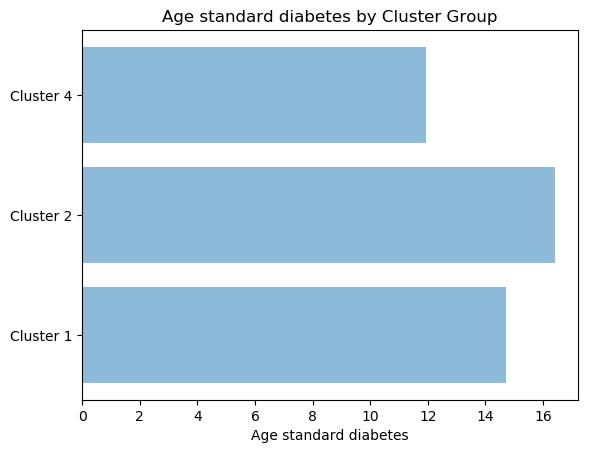

In [94]:
objects = ('Cluster 1', 'Cluster 2', 'Cluster 4')
y_pos = np.arange(len(objects))
performance = [14.7, 16.4, 11.9444]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Age standard diabetes')
plt.title('Age standard diabetes by Cluster Group')

plt.show()

Hmm.. we're missing some clusters. Let's try that again.

In [53]:
df_new1 = pd.merge(T_merged, df_health, how = 'outer')
df_new1

,Borough,Neighborhood,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighb ID,Age standard diabetes,Age standard asthma,Age standard mental health visits,Unnamed: 5
0,Scarborough,"Rouge, Malvern",M1B,43.806686,-79.194353,4.0,Fast Food Restaurant,Print Shop,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,NaN,NaN,NaN,NaN,NaN
1,Scarborough,"Highland Creek, Rouge Hill, Port Union",M1C,43.784535,-79.160497,4.0,Bar,Construction & Landscaping,Women's Store,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,NaN,NaN,NaN,NaN,NaN
2,Scarborough,"Guildwood, Morningside, West Hill",M1E,43.763573,-79.188711,4.0,Medical Center,Pizza Place,Intersection,Tech Startup,Mexican Restaurant,Breakfast Spot,Rental Car Location,Spa,Electronics Store,Dumpling Restaurant,NaN,NaN,NaN,NaN,NaN
3,Scarborough,Woburn,M1G,43.770992,-79.216917,4.0,Coffee Shop,Korean Restaurant,Convenience Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,137.0,16.2,11.8,7.2,NaN
4,Scarborough,Cedarbrae,M1H,43.773136,-79.239476,4.0,Athletics & Sports,Thai Restaurant,Bank,Bakery,Fried Chicken Joint,Caribbean Restaurant,Lounge,Hakka Restaurant,Cosmetics Shop,Costume Shop,NaN,NaN,NaN,NaN,NaN
5,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,2.0,Playground,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,139.0,16.4,13.2,9.2,NaN
6,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",M1K,43.727929,-79.262029,4.0,Coffee Shop,Playground,Discount Store,Department Store,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Dog Run,Doner Restaurant,NaN,NaN,NaN,NaN,NaN
7,Scarborough,"Clairlea, Golden Mile, Oakridge",M1L,43.711112,-79.284577,4.0,Bakery,Bus Line,Soccer Field,Metro Station,Bus Station,Intersection,Fast Food Restaurant,Park,Electronics Store,Eastern European Restaurant,NaN,NaN,NaN,NaN,NaN
8,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",M1M,43.716316,-79.239476,4.0,Motel,American Restaurant,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,NaN,NaN,NaN,NaN,NaN
9,Scarborough,"Birch Cliff, Cliffside West",M1N,43.692657,-79.264848,4.0,College Stadium,General Entertainment,Skating Rink,Café,Comic Shop,Concert Hall,Event Space,Ethiopian Restaurant,Empanada Restaurant,Colombian Restaurant,NaN,NaN,NaN,NaN,NaN


Okay we can see the problem now. The neighbourhood names don't add up. Let's see if we can find another dataset.

In [57]:
# try the old data on new metrics to see what we find
(df_new.groupby(['Cluster Labels', 'Neighborhood'], as_index=False).mean()
            .groupby('Cluster Labels')['Age standard mental health visits'].mean())

Cluster Labels
1.0    9.800000
2.0    9.200000
4.0    7.955556
Name: Age standard mental health visits, dtype: float64

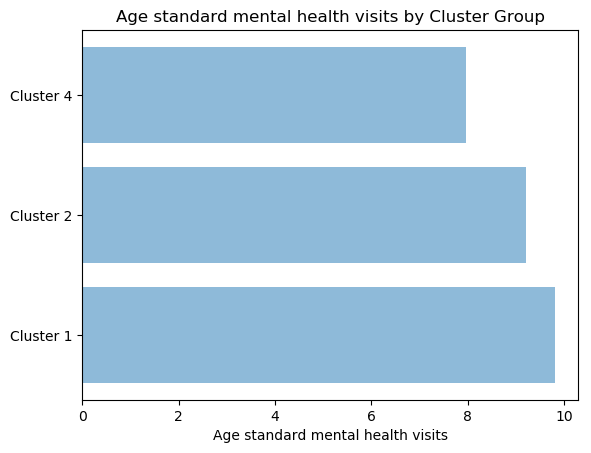

In [95]:
objects = ('Cluster 1', 'Cluster 2', 'Cluster 4')
y_pos = np.arange(len(objects))
performance = [9.8, 9.2, 7.95556]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Age standard mental health visits')
plt.title('Age standard mental health visits by Cluster Group')

plt.show()

In [89]:
(df_new.groupby(['Cluster Labels', 'Neighborhood'], as_index=False).mean()
            .groupby('Cluster Labels')['Age standard asthma'].mean())

Cluster Labels
1.0    15.300000
2.0    13.200000
4.0    11.466667
Name: Age standard asthma, dtype: float64

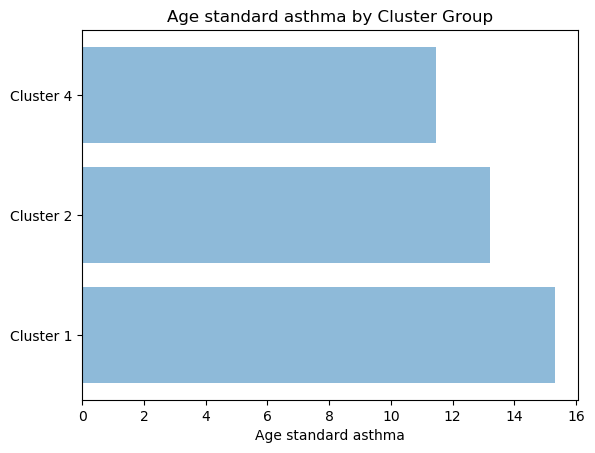

In [96]:
objects = ('Cluster 1', 'Cluster 2', 'Cluster 4')
y_pos = np.arange(len(objects))
performance = [15.3, 13.2, 11.4667]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Age standard asthma')
plt.title('Age standard asthma by Cluster Group')

plt.show()

In [61]:
# new data was found on the city of Toronto website: https://www.toronto.ca/city-government/data-research-maps/open-data/open-data-catalogue/health/#ccc4fb43-9c06-8414-32fd-54ab7d5ae422

In [75]:

body = client_cc1867bbf1084f38b5c6963e96462a3d.get_object(Bucket='clusteringneighbourhoodsintoronto-donotdelete-pr-kraceyoaqybbmv',Key='Toronto new health data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()



,Neighbourhood,Neighbourhood Id,Breast Cancer Screenings,Cervical Cancer Screenings,DineSafe Inspections,Female Fertility,Health Providers,Premature Mortality,Student Nutrition
0,West Humber-Clairville,1,57.02,60.52,10,59.923279,101,223.8,1105
1,Mount Olive-Silverstone-Jamestown,2,50.14,55.75,2,64.410021,44,242.6,5132
2,Thistletown-Beaumond Heights,3,55.22,61.15,4,57.480863,14,226.1,950
3,Rexdale-Kipling,4,54.28,64.69,0,45.586298,6,282.7,180
4,Elms-Old Rexdale,5,55.15,61.54,1,61.392833,1,163.6,2030


In [83]:
# merge the data, first by giving them common columns
df_data_3.rename(index=str, columns={"Neighbourhood":"Neighborhood"}, inplace=True)

In [84]:
df_data_3

,Neighborhood,Neighbourhood Id,Breast Cancer Screenings,Cervical Cancer Screenings,DineSafe Inspections,Female Fertility,Health Providers,Premature Mortality,Student Nutrition
0,West Humber-Clairville,1,57.02,60.52,10,59.923279,101,223.8,1105
1,Mount Olive-Silverstone-Jamestown,2,50.14,55.75,2,64.410021,44,242.6,5132
2,Thistletown-Beaumond Heights,3,55.22,61.15,4,57.480863,14,226.1,950
3,Rexdale-Kipling,4,54.28,64.69,0,45.586298,6,282.7,180
4,Elms-Old Rexdale,5,55.15,61.54,1,61.392833,1,163.6,2030
5,Kingsview Village-The Westway,6,57.08,59.07,4,59.800250,24,181.9,1740
6,Willowridge-Martingrove-Richview,7,61.92,64.86,0,44.866385,31,172.6,1325
7,Humber Heights-Westmount,8,58.84,67.05,0,44.992526,4,207.9,380
8,Edenbridge-Humber Valley,9,64.79,69.06,2,30.962343,10,193.0,0
9,Princess-Rosethorn,10,66.97,72.66,0,24.340771,6,189.8,0


In [85]:
df_new2 = pd.merge(T_merged, df_data_3, how = 'inner')

In [87]:
df_new2

,Borough,Neighborhood,Postcode,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Neighbourhood Id,Breast Cancer Screenings,Cervical Cancer Screenings,DineSafe Inspections,Female Fertility,Health Providers,Premature Mortality,Student Nutrition
0,Scarborough,Woburn,M1G,43.770992,-79.216917,4.0,Coffee Shop,Korean Restaurant,Convenience Store,Eastern European Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,137,56.83,60.67,6,55.628495,93,187.8,5690
1,Scarborough,Scarborough Village,M1J,43.744734,-79.239476,2.0,Playground,Women's Store,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,139,54.67,59.76,4,55.695142,24,239.2,2157
2,North York,Hillcrest Village,M2H,43.803762,-79.363452,4.0,Dog Run,Golf Course,Mediterranean Restaurant,Pool,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Doner Restaurant,48,69.60,61.75,15,25.680087,19,126.9,0
3,North York,Bayview Village,M2K,43.786947,-79.385975,4.0,Café,Japanese Restaurant,Bank,Chinese Restaurant,Dim Sum Restaurant,Discount Store,Dog Run,Doner Restaurant,Donut Shop,Drugstore,52,68.01,65.40,2,31.408776,128,117.1,0
4,North York,Willowdale West,M2R,43.782736,-79.442259,4.0,Pharmacy,Grocery Store,Pizza Place,Coffee Shop,Discount Store,Women's Store,Donut Shop,Dessert Shop,Dim Sum Restaurant,Diner,37,65.83,65.32,17,42.270939,31,180.2,0
5,North York,Victoria Village,M4A,43.725882,-79.315572,4.0,Coffee Shop,Hockey Arena,Intersection,Portuguese Restaurant,Women's Store,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,43,60.88,62.32,2,53.165522,9,240.2,725
6,East Toronto,The Beaches,M4E,43.676357,-79.293031,4.0,Trail,Health Food Store,Pub,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,Donut Shop,63,64.61,73.55,5,41.247426,24,221.2,0
7,East York,Thorncliffe Park,M4H,43.705369,-79.349372,4.0,Indian Restaurant,Yoga Studio,Supermarket,Gym,Housing Development,Intersection,Liquor Store,Discount Store,Park,Coffee Shop,55,49.73,54.51,7,87.647691,18,211.2,1450
8,York,Humewood-Cedarvale,M6C,43.693781,-79.428191,4.0,Field,Tennis Court,Hockey Arena,Trail,Drugstore,Dim Sum Restaurant,Diner,Discount Store,Dog Run,Doner Restaurant,106,63.49,69.42,1,40.076628,10,157.8,100
9,North York,Humber Summit,M9L,43.756303,-79.565963,4.0,Pharmacy,Pizza Place,Empanada Restaurant,Women's Store,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run,21,62.53,60.81,2,56.830601,14,234.1,1770


In [90]:
(df_new2.groupby(['Cluster Labels', 'Neighborhood'], as_index=False).mean()
            .groupby('Cluster Labels')['Breast Cancer Screenings'].mean())

Cluster Labels
1.0    56.64
2.0    54.67
4.0    62.39
Name: Breast Cancer Screenings, dtype: float64

Now let's make some graphs.

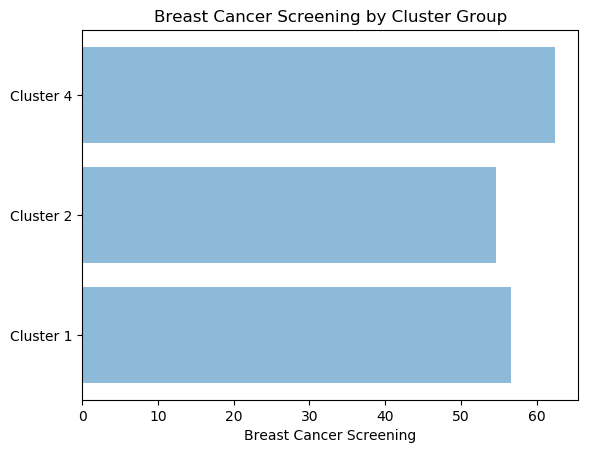

In [93]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Cluster 1', 'Cluster 2', 'Cluster 4')
y_pos = np.arange(len(objects))
performance = [56.64, 54.67, 62.39]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Breast Cancer Screening')
plt.title('Breast Cancer Screening by Cluster Group')

plt.show()